# The One-Body Problem

## Importing Packages

In [7]:
# Importing packages needed
import numpy as np
import matplotlib.pyplot as plt

## Testing our solution

Before we begin solving this problem, let us prepare for the worst. How would we know if our problem was accurately representing reality? It turns out that physical systems that are **conservative** (like our one-body-problem) have certain constraints that they need to abide by which are known as **conservation laws**. These 'laws' basically say that certain quantities must not change with time. Two of these quantities (described below) are the total energy of the system, and its total angular momentum. Thus, if we find a conservative system whose energy and/or angular momentum is not constant (up to some precision), then we can be sure that we've done something wrong!

**Note:** Remember, this is only true of conservative systems, not systems in which there is dissipation: a damped harmonic oscillator (for example) would not conserve energy, since this energy is being lost to the dissipative force.

### Defining our 'conserved quantity' functions

#### The Energy $E$

The total energy of the object (which is a conserved quantity) depends on the total kinetic energy and the total potential energy. The kinetic energy depends on the velocity `vVec` of the object, and the potential energy $V(r)$ depends on the force law, which in turn depends on the position vector `rVec` of the object. 

The total energy is given by $E = T + V$, which, in our case is:

$$ E = \frac{1}{2} m v^2 - \frac{G M m}{r}.$$

Clearly, since $m$ (the mass of our object) is unchanging, we can define an 'energy per unit mass' which must also be conserved. $$ E_\text{pm} = \frac{1}{2} v^2 - \frac{G M}{r}.$$

Thus, the `energyPM` function depends on `energyPM(rVec,vVec)`. In particular, we also know that they depend on the magnitudes of the `rVec` and `vVec` vectors.

In [8]:
def energyPM(rVec, vVec):
    # Finding the magnitude of the vectors
    r = np.linalg.norm(rVec)
    v = np.linalg.norm(vVec)
    
    return 0.5*v**2 - GM/r  # Return the energy per unit mass

#### The Angular Momentum $L$

Another conserved quantity in this problem is the angular momentum, which again depends on the position and velocity vectors `rVec` and `vVec`. The angular momentum is defined as $L = \vec{r} \times \vec{p}$. In our case (since the mass is unchanging), this is $$\vec{L} = m \left( \vec{r} \times \vec{v}\right).$$

As before, we can defined an 'angular momentum per unit mass', which must also be conserved. $\vec{L}_\text{pm} = \vec{r} \times \vec{v}$. This is a vector condition, but in our case, only the $z$ component contributes, and so the magnitude of the angular momentum must also be conserved, i.e. $L_\text{pm} = x v_y - y v_x = \text{constant}$, which is what we will use.

In [9]:
def LPM(rVec,vVec):
    # Getting the x and y components of rVec and vVec 
    x = rVec[0]
    y = rVec[1]
    vx= vVec[0]
    vy= vVec[1]
    
    return x*vy - y*vx # Returning their 'cross product'. Can also be done with np.linalg.cross

## Solving the problem numerically

### The Dynamics

From Newton's Law, we know that the force that a planet (of mass $m$) orbiting the sun (of mass $M$) experiences is $$\vec{F} = - \frac{G M m}{r^2} = - \frac{G M m}{r^3} \vec{r} = - \frac{G M m}{r^3} \left( x \hat{x} + y \hat{y} \right).$$

From this, convince yourself that 
$$a_x = - \frac{G M x}{r^{3/2}},$$

$$a_y = - \frac{G M y}{r^{3/2}},$$

which is what we'll use in defining the dynamics.

##### Defining the constants of the problem

In [10]:
G = 6.673e-11        # Newton's Constant in MKS units
M = 1.99e30          # The mass of the Sun in kilograms
GM = G * M           # Defined for ease
AU = 149597870700.0  # Earth-Sun distance in metres
yr = 365*24*60*60.0  # One year in seconds

##### Defining the dynamics (the acceleration) from Newton's Laws

In [11]:
def aVec(rVec):
    x = rVec[0]                   # Extracting x and y
    y = rVec[1]                   # from rVec
    
    RCube = (x**2 + y**2)**(1.5)  # Computing r**3 to simplify calculations
    
    ax = -GM*x/RCube              # Computing the acceleration vector's components
    ay = -GM*y/RCube              # from Newton's Laws
    
    return np.array([ax,ay])      # Return a "vector"

### The Kinematics

##### Setting the initial conditions

In [12]:
t_initial = 0                   # Initial time
t_final   = 1*yr                # Final time
dt = 1000.0                     # Time-step of 1 hour
N = int((t_final-t_initial)/dt) # Number of time-steps 

r0 = 1*AU                       # Magnitude of distance from the sun
v0 = 2*np.pi*r0/yr              # Magnitude of velocity for a circular orbit
r0Vec = r0*np.array([1.0,0.0])  # The initial position vector, along x-axis
v0Vec = v0*np.array([0.0,1.0])  # The initial velcoity vector, along y-axis

##### Defining the arrays to store data and the leapfrog method

In [13]:
rVecs = np.zeros((N+1,2),float)       # An array of 2D vectors of length N+1 for position
vVecs = np.zeros((N+1,2),float)       # An array of 2D vectors of length N+1 for velocity
t     = np.zeros(N+1,float)           # An array of length N+1 for time

rVecs[0] = r0Vec                      # Setting the initial position to r0Vec
vVecs[0] = v0Vec + aVec(rVecs[0])*dt/2 # Setting the initial velocity using the leapfrog method


### Arrays to test our solution ###

energyArray = np.zeros(N+1, float)
LArray      = np.zeros(N+1, float)

energyArray[0] = energyPM(r0Vec,v0Vec)
LArray[0] = LPM(r0Vec,v0Vec)

##### Solving the kinematics

In [14]:
for i in range(1,N+1):
    t[i]     = i*dt
    rVecs[i] = rVecs[i-1] + vVecs[i-1]*dt
    vVecs[i] = vVecs[i-1] + aVec(rVecs[i])*dt
    
    ### Calculating our conserved quantities ###
    
    energyArray[i] = energyPM(rVecs[i],vVecs[i])
    LArray[i]      = LPM(rVecs[i],vVecs[i])

### Plotting the solution

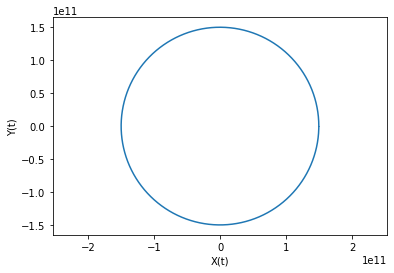

In [15]:
xArray = rVecs[:,0]         # Slicing out the x-values from rVec
yArray = rVecs[:,1]         # Slicing out the y-values from rVec

plt.plot(xArray,yArray)     # Plotting y vs. x

plt.axis('equal')           # Matplotlib commands to make the plot axes equal and change the labels
plt.xlabel("X(t)")
plt.ylabel("Y(t)")

plt.show()

### Plotting our conserved quantities

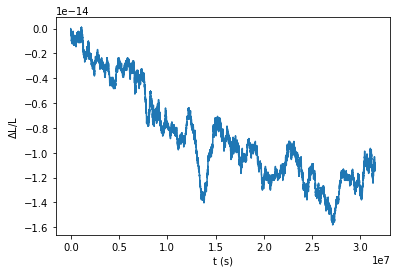

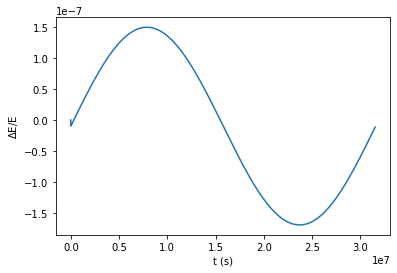

In [16]:
plt.plot(t,(LArray-LArray[0])/LArray[0])  # Plotting the rescaled angular momentum
plt.xlabel("t (s)")                       # Setting the x and y labels
plt.ylabel("$\Delta$L/L")
plt.show()                                # Show the plot


plt.plot(t,(energyArray-energyArray[0])/energyArray[0]) # Plotting the rescaleds energy
plt.xlabel("t (s)")                                     # Setting the x and y labels
plt.ylabel("$\Delta$E/E")
plt.show()                                              # Show the plot